In [8]:
import os
ROOT = os.path.dirname(os.path.dirname(os.getcwd()))
print(ROOT)

/home/saisampathkedari/Bayesian-Filtering-and-Smoothing


In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
from filters.kalman_filter import *
from filters.extended_kalman_filter import *
from models.pendulum import *

## Define the Pendulum

In [11]:
dt = 0.01
R = np.array([[0.1]]) # measurement noise

pendulum_system = make_true_pendulum_system(dt = dt,
                                            R = R)

## Generate Data

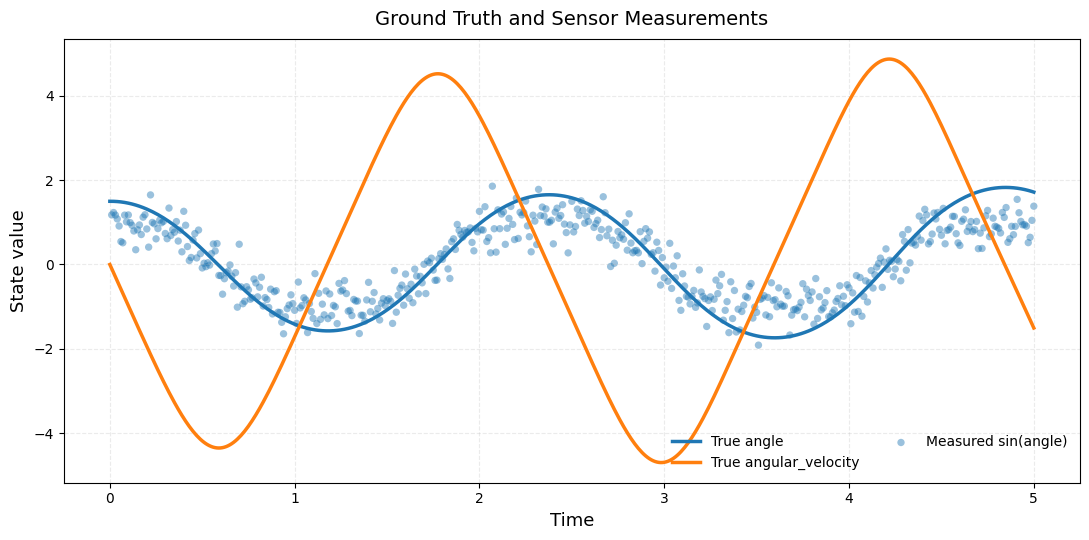

In [12]:
# ============================================================
# 0. Random number generator
# ============================================================
rng = np.random.default_rng(seed=None)  # non-deterministic runs

# ============================================================
# 1. Ground-truth system definition (reality)
# ============================================================
x0 = np.array([1.5, 0.0])  # true initial state

T = 5.0
Nsims = int(T / dt)
times = np.linspace(0.0, T, Nsims + 1)

# Observe at every step except t0
delta = 1
obs_ind = np.arange(delta,times.shape[0], delta)

# ============================================================
# 2. Generate ground truth and synthetic sensor data
# ============================================================
truth, measurements = generate_nonlinear_data(
    times=times,
    x0=x0,
    obs_ind=obs_ind,
    system=pendulum_system,     # TrueNonLinearSystem
    rng=rng
)

plot_data_and_truth(
    truth,
    measurements,
    title="Ground Truth and Sensor Measurements"
)

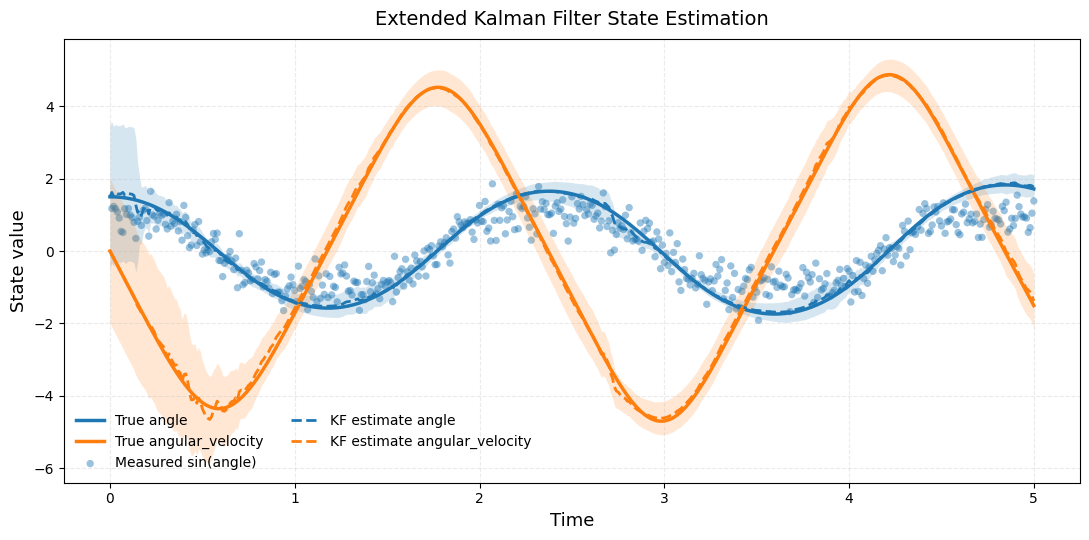

In [13]:
# ============================================================
# 3. Extended Kalman filter design (estimator's belief)
# ============================================================
# Prior belief
X0 = Gaussian(
    mean=x0,
    cov= np.eye(2)
)

qc = 0.1


ekf_model = ExtendedKalmanFilterModel(
    Phi = lambda x : pendulum_dynamics(x, dt),
    h = pendulum_measurement,
    jacobian_Phi= lambda x: pendulum_jacobian_dynamics(x, dt),
    jacobian_h= pendulum_jacobian_measurement,
    Q = pendulum_process_noise_cov(dt, qc),
    R = R
)

# ============================================================
# 4. Run Kalman filter and visualize estimation
# ============================================================
kf_history = run_extended_kalman_filter(
    y_Observations=measurements,
    model=ekf_model,
    X0=X0
)

plot_data_and_truth(
    truth,
    measurements,
    kf=kf_history,
    title="Extended Kalman Filter State Estimation"
)

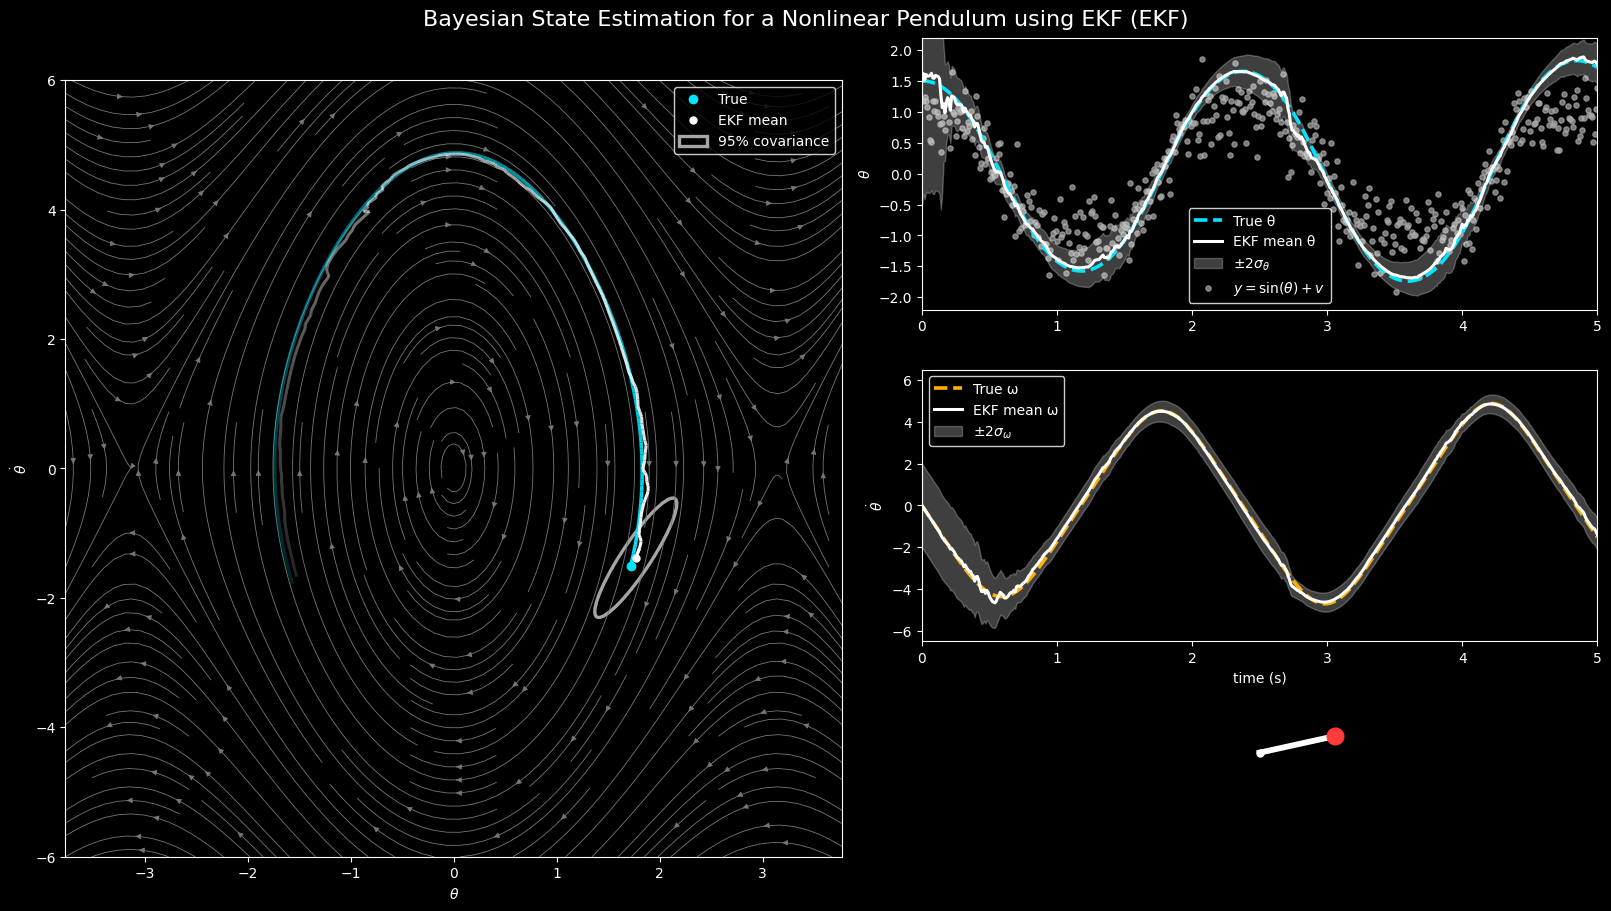

In [14]:
save_path = os.path.join( ROOT, "images/bayesian_filtering/pendulum_true_vs_ekf.gif" )
animate_truth_vs_filter(
    truth=truth,
    measurements=measurements,
    kf_history=kf_history,
    make_phase_portrait_fn=make_pendulum_phase_portrait,
    save_path=save_path,
    slow_factor=4.0,
    filter_name = "EKF",
    title = "Bayesian State Estimation for a Nonlinear Pendulum using EKF"
)